In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('/kaggle/input/web-page-phishing-detection-dataset/dataset_phishing.csv')

In [4]:
df.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [5]:
df.describe()

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        1.000000      0.000000      0.000000      0.000000      0.0   
max       43.000000      4.000000      3.000000     19.000000      0.0   

              nb_eq  ...   empty_title  domain_in_title  \
count  11430.000000  ...  11430.000000     11430.000000   
mean       0.293176  ...      0.124759         0.775853   
std        0.998317  ...      0.330460         0.417038   
min        0.000000  ...      0.000000         0.000000   
25%        0.000000  ...      0.000000         1.000000   
50%        0.000000  ...      0.000000         1.000000   
75%        0.000000  ...      0.000000         1.000000   
max       19.000000  ...      1.000000         1.000000   

       domain_with_copyright  whois_registered_domain  \
count           11430.000000             11430.000000   
mean                0.439545                 0.072878   
std                 0.496353                 0.259948   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 1.000000                 0.000000   
max                 1.000000                 1.000000   

       domain_registration_length    domain_age   web_traffic    dns_record  \
count                11430.000000  11430.000000  1.143000e+04  11430.000000   
mean                   492.532196   4062.543745  8.567566e+05      0.020122   
std                    814.769415   3107.784600  1.995606e+06      0.140425   
min                     -1.000000    -12.000000  0.000000e+00      0.000000   
25%                     84.000000    972.250000  0.000000e+00      0.000000   
50%                    242.000000   3993.000000  1.651000e+03      0.000000   
75%                    449.000000   7026.750000  3.738455e+05      0.000000   
max                  29829.000000  12874.000000  1.076799e+07      1.000000   

       google_index     page_rank  
count  11430.000000  11430.000000  
mean       0.533946      3.185739  
std        0.498868      2.536955  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        1.000000      3.000000  
75%        1.000000      5.000000  
max        1.000000     10.000000  

[8 rows x 87 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [7]:
pd.set_option('display.max_rows', 100)
df.isna().sum()

url                           0
length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_s

In [8]:
pd.reset_option('display.max_rows')

In [9]:
classes={'legitimate':0, 'phishing':1}
df['status'] = df['status'].map(classes)

/tmp/ipykernel_32/3479204433.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


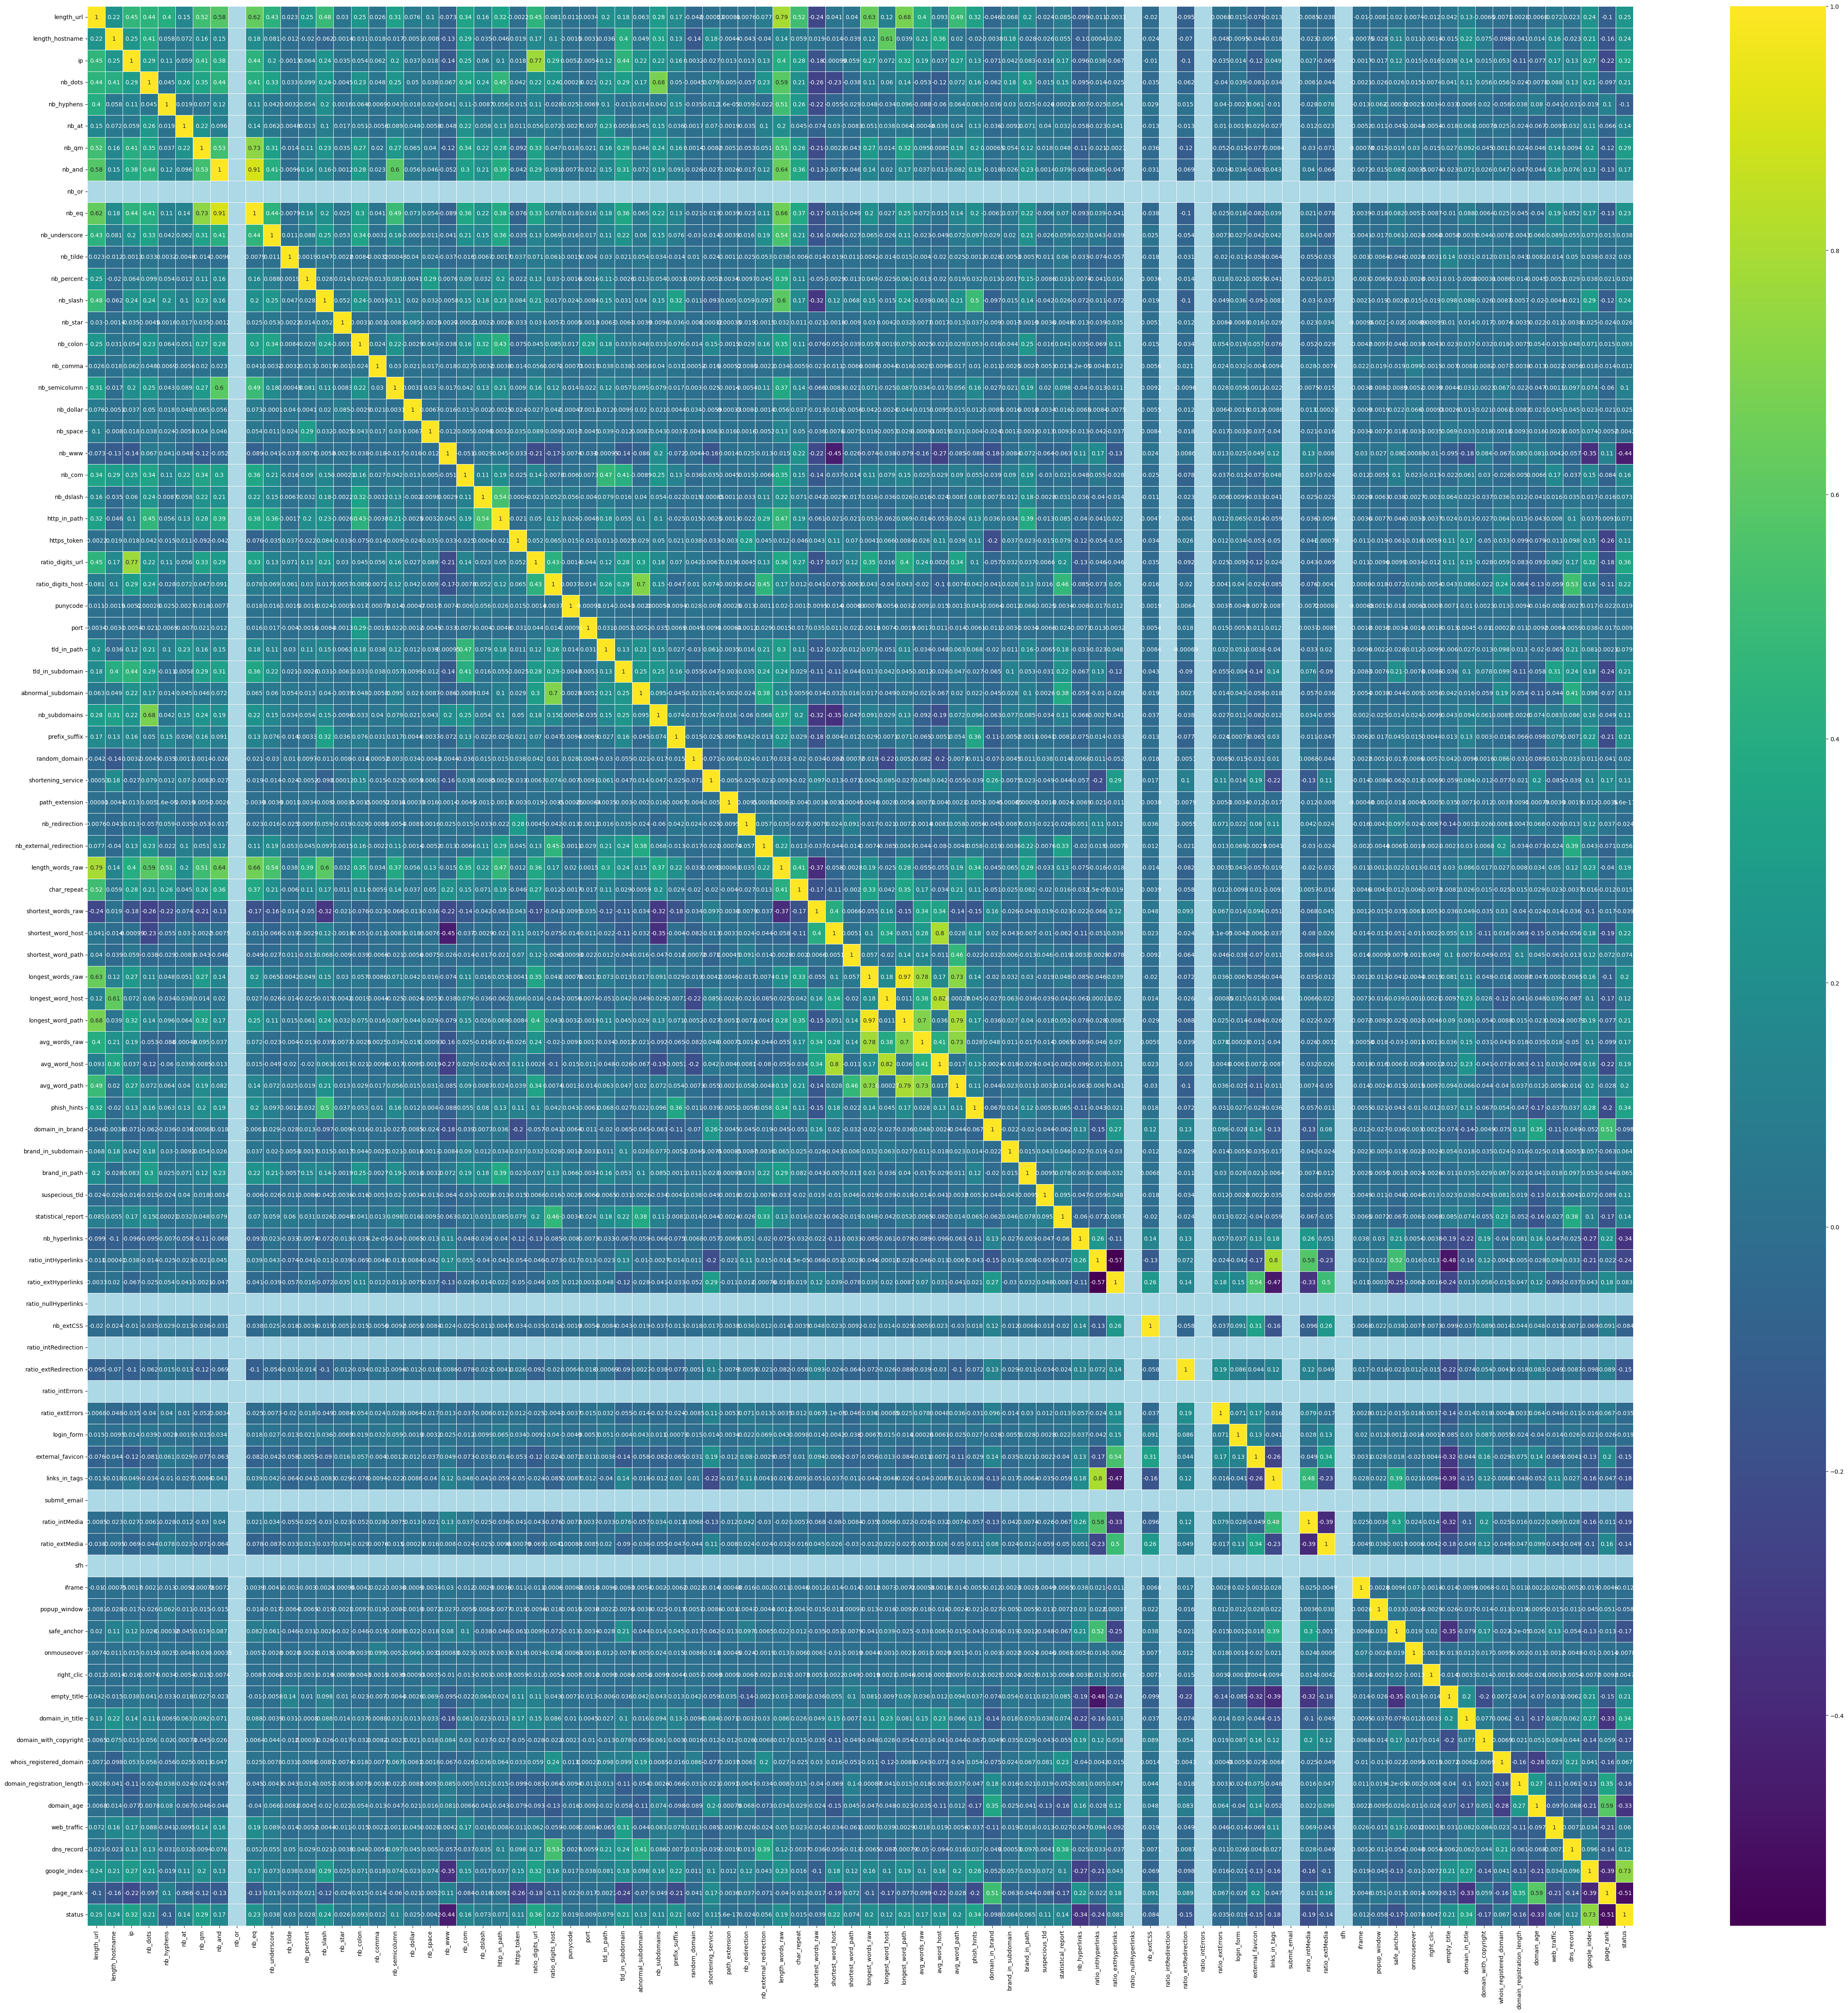

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(60,60))
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue') 
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()

In [11]:
corr_matrix['status']

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [12]:
status_corr = corr_matrix['status']
status_corr.shape

(88,)

In [13]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

In [14]:
features_selected = feature_selector_correlation(status_corr, 0.2)
features_selected

[('length_url', ['0.248580']),
 ('length_hostname', ['0.238322']),
 ('ip', ['0.321698']),
 ('nb_dots', ['0.207029']),
 ('nb_qm', ['0.294319']),
 ('nb_eq', ['0.233386']),
 ('nb_slash', ['0.242270']),
 ('nb_www', ['-0.443468']),
 ('ratio_digits_url', ['0.356395']),
 ('ratio_digits_host', ['0.224335']),
 ('tld_in_subdomain', ['0.208884']),
 ('prefix_suffix', ['0.214681']),
 ('shortest_word_host', ['0.223084']),
 ('longest_words_raw', ['0.200147']),
 ('longest_word_path', ['0.212709']),
 ('phish_hints', ['0.335393']),
 ('nb_hyperlinks', ['-0.342628']),
 ('ratio_intHyperlinks', ['-0.243982']),
 ('empty_title', ['0.207043']),
 ('domain_in_title', ['0.342807']),
 ('domain_age', ['-0.331889']),
 ('google_index', ['0.731171']),
 ('page_rank', ['-0.511137']),
 ('status', ['1.000000'])]

In [15]:
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'empty_title',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

In [16]:
X= df[selected_features]
X

length_url  length_hostname  ip  nb_dots  nb_qm  nb_eq  nb_slash  \
0              37               19   0        3      0      0         3   
1              77               23   1        1      0      0         5   
2             126               50   1        4      1      3         5   
3              18               11   0        2      0      0         2   
4              55               15   0        2      0      0         5   
...           ...              ...  ..      ...    ...    ...       ...   
11425          45               17   0        2      0      0         4   
11426          84               18   0        5      1      1         5   
11427         105               16   1        2      1      1         5   
11428          38               30   0        2      0      0         3   
11429         477               14   1       24      1      9         4   

       nb_www  ratio_digits_url  ratio_digits_host  ...  longest_words_raw  \
0           1          0.000000           0.000000  ...                 11   
1           0          0.220779           0.000000  ...                 32   
2           0          0.150794           0.000000  ...                 17   
3           0          0.000000           0.000000  ...                  5   
4           1          0.000000           0.000000  ...                 11   
...       ...               ...                ...  ...                ...   
11425       1          0.000000           0.000000  ...                 11   
11426       1          0.023810           0.000000  ...                 10   
11427       1          0.142857           0.000000  ...                 15   
11428       1          0.000000           0.000000  ...                 22   
11429       1          0.085954           0.785714  ...                 12   

       longest_word_path  phish_hints  nb_hyperlinks  ratio_intHyperlinks  \
0                      6            0             17             0.529412   
1                     32            0             30             0.966667   
2                     17            0              4             1.000000   
3                      0            0            149             0.973154   
4                     11            0            102             0.470588   
...                  ...          ...            ...                  ...   
11425                 11            0            199             0.884422   
11426                  8            0              3             1.000000   
11427                 15            0             68             0.470588   
11428                  0            0             32             0.375000   
11429                 12            3             21             0.428571   

       empty_title  domain_in_title  domain_age  google_index  page_rank  
0                0                0          -1             1          4  
1                0                1        5767             1          2  
2                0                1        4004             1          0  
3                0                1          -1             0          3  
4                0                0        8175             0          6  
...            ...              ...         ...           ...        ...  
11425            0                0        5396             0          6  
11426            0                1        6728             1          0  
11427            0                0        8515             1         10  
11428            0                1        2836             0          4  
11429            0                1          -1             1          0  

[11430 rows x 23 columns]

In [17]:
y = df['status']
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [19]:
rfc=RandomForestClassifier()

In [20]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]


In [44]:
importances

array([0.03183573, 0.02547825, 0.00730068, 0.02020559, 0.01050955,
       0.00622609, 0.02133479, 0.06538339, 0.03035888, 0.01864875,
       0.0007005 , 0.0032868 , 0.02077447, 0.02598116, 0.04139764,
       0.0367212 , 0.1286977 , 0.04144054, 0.00371833, 0.02443459,
       0.05555157, 0.23410404, 0.14590976])

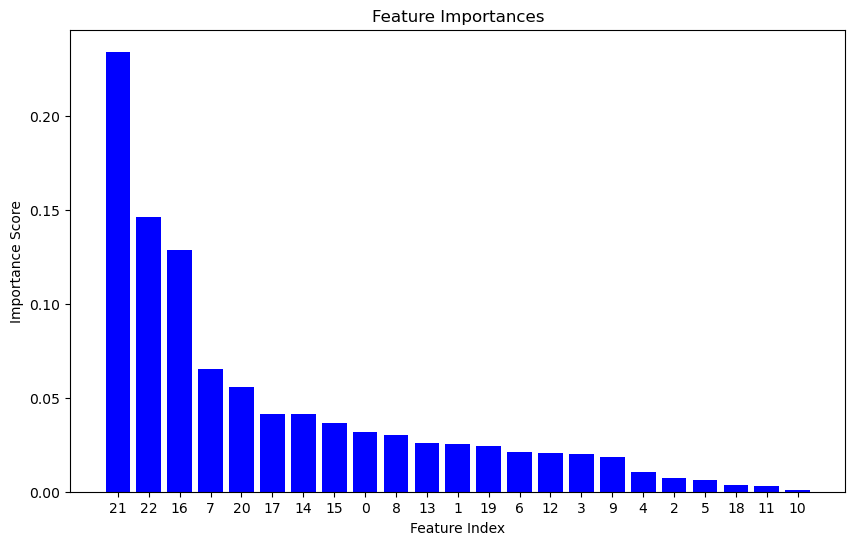

In [28]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()


In [21]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,classification_report

def custom_accuracy_set (model, X_train, X_test, y_train, y_test, train=True):
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    
    
    if train:
        x = X_train
        y = y_train
    elif not train:
        x = X_test
        y = y_test
        
    y_predicted = model.predict(x)
    
    accuracy = accuracy_score(y, y_predicted)
    print('model accuracy: {0:4f}'.format(accuracy))
    oconfusion_matrix = confusion_matrix(y, y_predicted)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    sns.heatmap(oconfusion_matrix,
            annot=True,
            fmt='g',
            xticklabels=['Legitimate','Phishing'],
            yticklabels=['Legitimate','Phishing'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()
    print(classification_report(y, y_predicted))
    
    
    oroc_auc_score = lb.transform(y), lb.transform(y_predicted)
    

model accuracy: 1.000000
Confusion matrix: 
 [[4556    0]
 [   0 4588]]


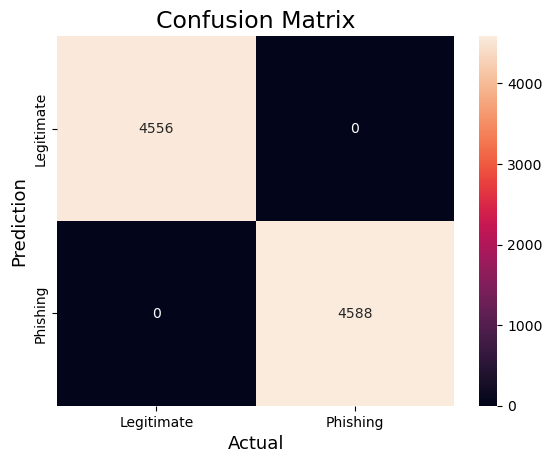

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4556
           1       1.00      1.00      1.00      4588

    accuracy                           1.00      9144
   macro avg       1.00      1.00      1.00      9144
weighted avg       1.00      1.00      1.00      9144



In [22]:
custom_accuracy_set(rfc, X_train, X_test, y_train, y_test, train=True)

model accuracy: 0.961942
Confusion matrix: 
 [[1108   51]
 [  36 1091]]


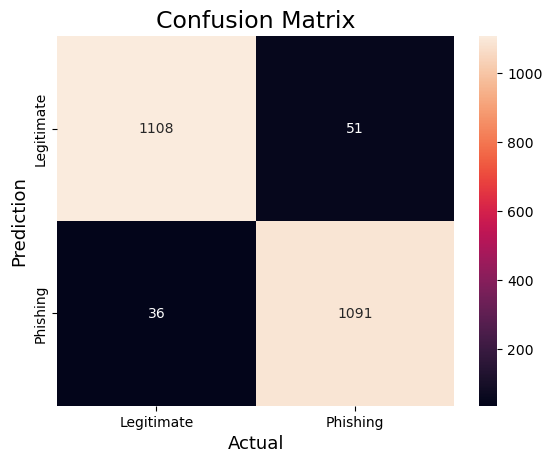

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1159
           1       0.96      0.97      0.96      1127

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



In [23]:
custom_accuracy_set(rfc, X_train, X_test, y_train, y_test, train=False)

In [24]:
import scikitplot as skplt

In [36]:
test_sizes = [ 0.2, 0.3, 0.4, 0.5]
accuracy_scores = []


In [37]:
for test_size in test_sizes:
    # Split the data into training and testing sets using the current test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Instantiate and fit the Random Forest Classifier
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rfc.predict(X_test)

    # Calculate the accuracy and append it to the accuracy_scores list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


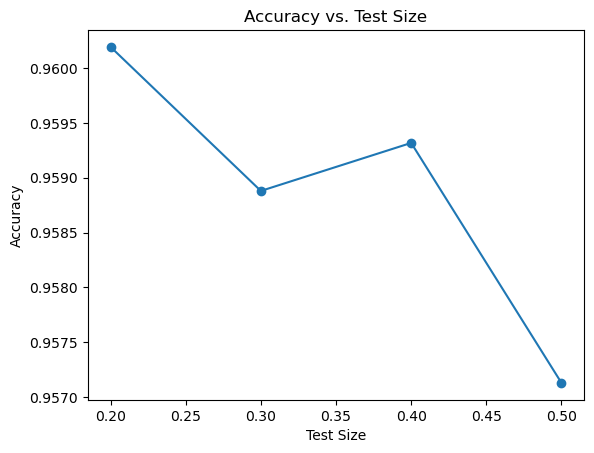

In [38]:
plt.plot(test_sizes, accuracy_scores, marker='o')
plt.title("Accuracy vs. Test Size")
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.show()



In [40]:
decision_tree = rfc.estimators_[0]  # Extract the first decision tree (change index as needed)


In [42]:
from sklearn import tree

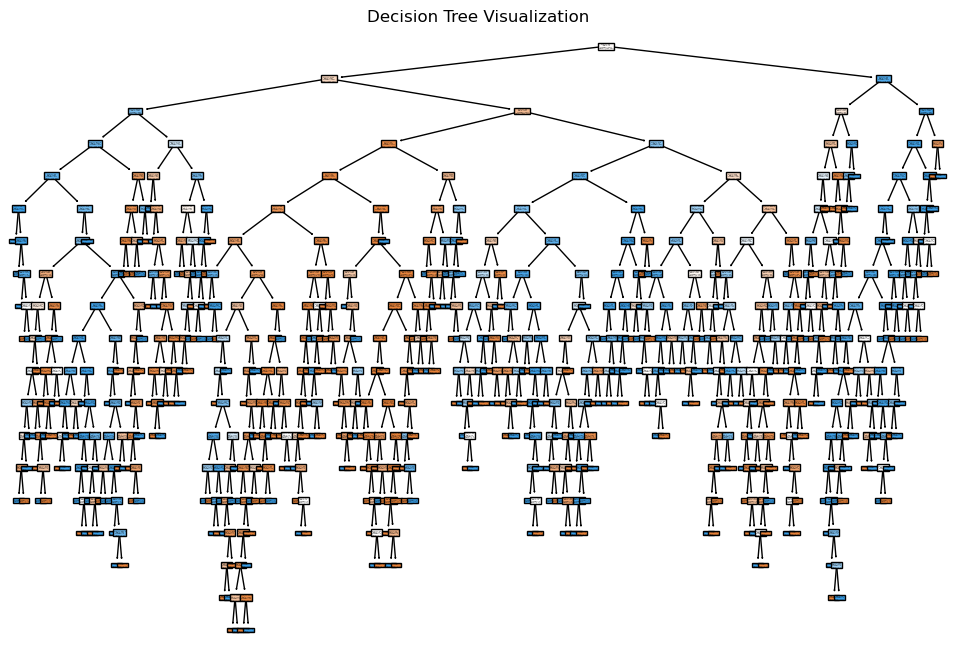

In [43]:
plt.figure(figsize=(12, 8))
tree.plot_tree(decision_tree, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [25]:
# cm = confusion_matrix(actual,predicted)
 
#Plot the confusion matrix.
# sns.heatmap(cm,
#             annot=True,
#             fmt='g',
#             xticklabels=['Dog','Not Dog'],
#             yticklabels=['Dog','Not Dog'])
# plt.ylabel('Prediction',fontsize=13)
# plt.xlabel('Actual',fontsize=13)
# plt.title('Confusion Matrix',fontsize=17)
# plt.show()